<a href="https://colab.research.google.com/github/itzwow/FMML_August_AmitBera/blob/main/Lab2_20fmml20220111_FMML_Aug22_M1Lab2_DataFeatures%26Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FMML Module 1, Lab 2<br>
Module Coordinator : amit.pandey@research.iiit.ac.in <br>

### The aim of this lab is to introduce DATA and FEATURES.
We will study: Feature extraction and Data Augmentation.
Let's get started.



Make a copy before running the cells

### Data can be anything like text, image , sound signals, and even a mix of multiple types (multimodal). We need to learn how to handle raw data, and how to use them for our analysis.

# Extracting features from data


 



In [ ]:
## Standard Imports.

! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams 
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=06eb5f30df2c131761e6c43809795c86400ee5264074745ae4d1e28f6ab22caf
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


## What are features? 
### Features are individual independent variables that act like an input to your system. 
A very basic example is: In z = x + y, x and y are the features.
We can have simple features like above or even more complex features learned by our machine learning models (we will study these later on).

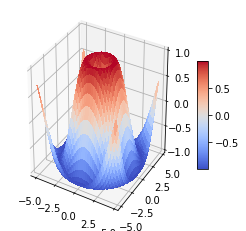

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data

 
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(1))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 1, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25) # feature 1
Y = np.arange(-5, 5, 0.25) # feature 2
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) #output
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.4, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

# Part 2: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features.They are converted into vectors (embeddings) or one hot encoded.  Let us explore a simple way of converting text to features. 

Let us download a few documents off Wikipedia.

In [ ]:
## set language and then download the data.

topic1 = 'Giraffe'
topic2 = 'Elephant'
wikipedia.set_lang('en') 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content



This is what the text looks like:

In [ ]:
fr2 ## the french textual data describing the second topic.

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας signifiant « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

In [ ]:
eng1 ##English Textual data of fist topic

'The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes were thought to be one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into up to eight extant species due to new research into their mitochondrial and nuclear DNA, as well as morphological measurements. Seven other extinct species of Giraffa are known from the fossil record.\nThe giraffe\'s chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns. It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south, and from Niger in the west to Somalia in the east. Giraffes usually inhabit savannahs and woodlands. Their food source is leaves, fruits, and flowers of woody p

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters, i.e. if not a-z then replace with space.
  return text

In [ ]:
#Regex Code:

t1 = re.search('^((?=.+[@#$%&*-_\/\.!])(?=.+[a-z])(?=.+[A-Z])(?=.+[0-9])[A-Za-z0-9@#$%&*-_\/\.!]{6,30})$', fr2)


In [ ]:
text1 = re.sub('[a-z]', '1', 'espèce d\'« éléphant d\?Afrique »,') #sub will substitute with '1' to all the letters
text1

"111è11 1'« é1é11111 1\\?A111111 »,"

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes were thought to be one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into up to eight extant species due to new research into their mitochondrial and nuclear DNA, as well as morphological measurements. Seven other extinct species of Giraffa are known from the fossil record.
The giraffe's chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns. It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south, and from Niger in the west to Somalia in the east. Giraffes usually inhabit savannahs and woodlands. Their food source is leaves, fruits, and flowers of woody plan

In [ ]:
print(fr1)

La Girafe (Giraffa camelopardalis) est une espèce de mammifères ongulés artiodactyles, du groupe des ruminants, vivant dans les savanes africaines et répandue du Tchad jusqu'en Afrique du Sud. Son nom commun vient de l'arabe زرافة, zarāfah, mais l'animal fut anciennement appelé camélopard, du latin camelopardus, contraction de camelus (chameau) en raison du long cou et de pardus (léopard) en raison des taches recouvrant son corps. Après des millions d'années d'évolution, la girafe a acquis une anatomie unique avec un cou particulièrement allongé qui lui permet notamment de brouter haut dans les arbres.
Neuf populations, se différenciant par leurs robes et formes, ont été décrites par les naturalistes depuis le XIXe siècle parfois comme espèces à part entière, mais généralement considérées comme simples sous-espèces jusqu'au XXIe siècle. Cependant la taxonomie des girafes est actuellement débattue parmi les scientifiques.
L’espèce est considérée comme vulnérable par l'UICN : il y avait 

Instead of directly using characters as the features, to understand a text better, we may consider group of tokens i.e. ngrams as features.
 
For this example let us consider that each character is one word, and let us see how n-grams work.


## nltk library provides many tools for text processing, please explore them.

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on. 

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
## Dont worry if you do not understand these functions right away, you can revisit them and follow step-by-step.

# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  # sort the keys in alphabetic order
  combined = zip(keys, values) ## keys i.e. characters on x axis and their count in the given doc as values.
  zipped_sorted = sorted(combined, key=lambda x: x[0]) ## sorting based on keys, to get a to z order.
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

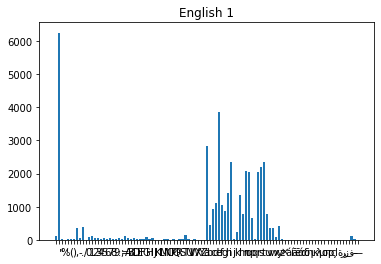

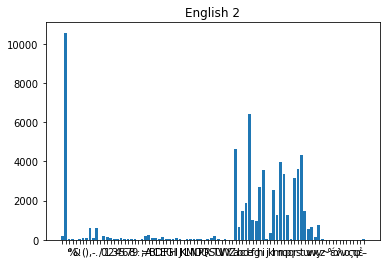

In [ ]:
## we passed ngrams 'n' as 1 to get unigrams. Unigram is nothing but single token (in this case character).
## ngrams imported from nltk, it returns ngrams from given string. Counter returns dictionary with keys as elements and counts as values.
unigram_eng1 = Counter(ngrams(eng1,1)) ##just to get count of each element. 
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

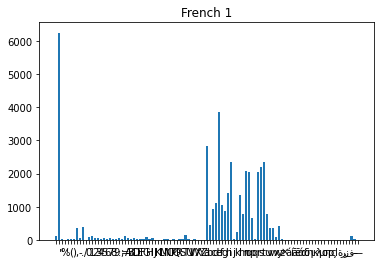

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


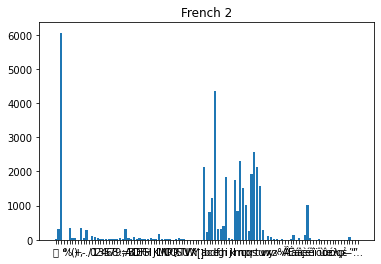

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

## A good feature is one that helps in easy prediction and classification. 
## for ex : if you wish to differentiate between grapes and apples, size can be one of the useful features.

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

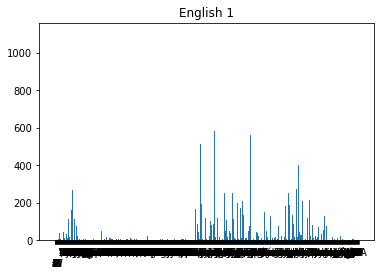

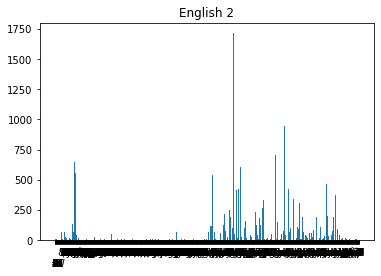

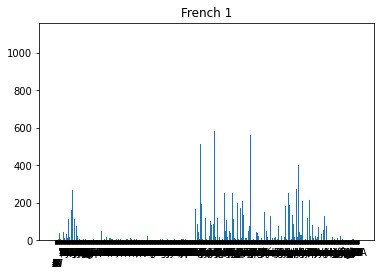

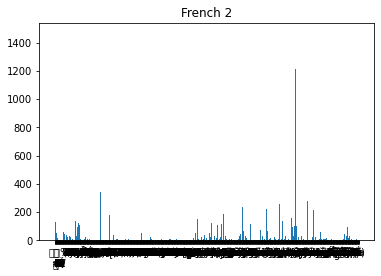

In [23]:
## Now instead of unigram, we will use bigrams as features, and see how useful bigrams are as features.

bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [24]:
## lets have a lot at bigrams.

bigram_eng1


Counter({('T', 'h'): 114,
         ('h', 'e'): 688,
         ('e', ' '): 1106,
         (' ', 'g'): 268,
         ('g', 'i'): 201,
         ('i', 'r'): 315,
         ('r', 'a'): 401,
         ('a', 'f'): 231,
         ('f', 'f'): 253,
         ('f', 'e'): 274,
         (' ', 'i'): 357,
         ('i', 's'): 209,
         ('s', ' '): 886,
         (' ', 'a'): 738,
         ('a', ' '): 166,
         (' ', 'l'): 202,
         ('l', 'a'): 157,
         ('a', 'r'): 311,
         ('r', 'g'): 29,
         ('g', 'e'): 144,
         (' ', 'A'): 58,
         ('A', 'f'): 17,
         ('f', 'r'): 72,
         ('r', 'i'): 146,
         ('i', 'c'): 159,
         ('c', 'a'): 147,
         ('a', 'n'): 513,
         ('n', ' '): 513,
         (' ', 'h'): 234,
         ('h', 'o'): 84,
         ('o', 'o'): 50,
         ('o', 'f'): 184,
         ('e', 'd'): 253,
         ('d', ' '): 581,
         (' ', 'm'): 262,
         ('m', 'a'): 211,
         ('a', 'm'): 59,
         ('m', 'm'): 26,
         ('a', 'l')

In [25]:
## a function to plot 2-D histogram. The values are color mapped. 

def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))] #ord converts char to code
  plt.imshow(freq, cmap = 'jet')
  plt.colorbar()
  return freq

In [26]:
ord

<function ord(c, /)>

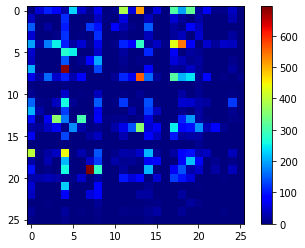

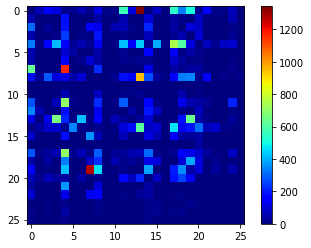

In [27]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

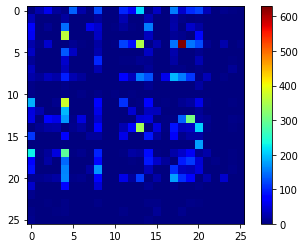

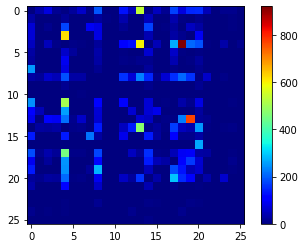

In [28]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text. 

In [29]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')


In [30]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 694.0
('h', 'e') : 688.0
('i', 'n') : 563.0
('e', 's') : 543.0
('a', 'n') : 513.0
('r', 'e') : 444.0
('e', 'r') : 433.0
('r', 'a') : 401.0
('a', 'l') : 386.0
('n', 'd') : 363.0

English 2:
('a', 'n') : 1342.0
('t', 'h') : 1274.0
('h', 'e') : 1167.0
('i', 'n') : 945.0
('e', 'r') : 747.0
('r', 'e') : 708.0
('l', 'e') : 705.0
('n', 'd') : 669.0
('n', 't') : 638.0
('h', 'a') : 631.0

French 1:
('e', 's') : 629.0
('l', 'e') : 378.0
('d', 'e') : 366.0
('e', 'n') : 354.0
('o', 'n') : 346.0
('n', 't') : 312.0
('r', 'e') : 291.0
('r', 'a') : 229.0
('a', 'n') : 213.0
('o', 'u') : 207.0

French 2:
('e', 's') : 922.0
('n', 't') : 773.0
('d', 'e') : 623.0
('e', 'n') : 599.0
('a', 'n') : 539.0
('l', 'e') : 510.0
('o', 'n') : 478.0
('r', 'e') : 457.0
('u', 'r') : 294.0
('t', 'i') : 279.0


## At times, we need to reduce the number of features. We will discuss this more in the upcoming sessions, but a small example has been discussed here. Instead of using each unique token (a word) as a feature, we reduced the number of features by using 1-gram and 2-gram of characters as features.

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics. 

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

In [39]:
topic1 = 'Cricket'
topic2 = 'Elephant'
wikipedia.set_lang('hi') 
hin1 = wikipedia.page(topic1).content
hin2 = wikipedia.page(topic2).content
wikipedia.set_lang('en')
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('de') #german
ger1 = wikipedia.page(topic1).content
ger2 = wikipedia.page(topic2).content

In [32]:
hin1

'क्रिकेट एक बल्ले और गेंद का दलीय खेल है जिसकी शुरुआत दक्षिणी इंग्लैंड में हुई थी।\nइसका सबसे प्राचीन निश्चित संदर्भ १५९८ में मिलता है, अब यह १०० से अधिक देशों में खेला जाता है। क्रिकेट के कई प्रारूप हैं, इसका उच्चतम स्तर टेस्ट क्रिकेट है, जिसमें वर्तमान प्रमुख राष्ट्रीय टीमें भारत, ऑस्ट्रेलिया, दक्षिण अफ्रीका, इंग्लैण्ड, श्रीलंका, वेस्टइंडीज, न्यूजीलैण्ड, पाकिस्तान, ज़िम्बाब्वे , बांग्लादेश अफ़ग़ानिस्तान और आयरलैण्ड हैं। अप्रैल 2018 में, आईसीसी ने घोषणा की कि वह 1 जनवरी 2019 से अपने सभी 120सदस्यों को ट्वेन्टी-२० अंतरराष्ट्रीय की मान्यता प्रदान की है औरक्रिकेट के बल्ले से गेंद को खेलता है। इसी बीच गेंदबाज की टीम के अन्य सदस्य मैदान में क्षेत्ररक्षक के रूप में अलग-अलग स्थितियों में खड़े रहते हैं, ये खिलाड़ी बल्लेबाज को दौड़ बनाने से रोकने के लिए गेंद को पकड़ने का प्रयास करते हैं और यदि सम्भव हो तो उसे आउट करने की कोशिश करते हैं। बल्लेबाज यदि आउट नहीं होता है तो वो विकेटों के बीच में भाग कर दूसरे बल्लेबाज ("गैर स्ट्राइकर") से अपनी स्थिति को बदल सकता है, जो पिच के दूसरी ओर खड़ा होता है। इ

In [33]:
hin2

'हाथी जमीन पर रहने वाला एक विशाल आकार का प्राणी है। यह जमीन पर रहने वाला सबसे विशाल स्तनपायी है। यह एलिफैन्टिडी कुल और प्रोबोसीडिया गण का प्राणी है। आज एलिफैन्टिडी कुल में केवल दो प्रजातियाँ जीवित हैं: ऍलिफ़स तथा लॉक्सोडॉण्टा। तीसरी प्रजाति मैमथ विलुप्त हो चुकी है।जीवित दो प्रजातियों की तीन जातियाँ पहचानी जाती हैं:- लॉक्सोडॉण्टा प्रजाति की दो जातियाँ - अफ़्रीकी खुले मैदानों का हाथी (अन्य नाम: बुश या सवाना हाथी) तथा (अफ़्रीकी जंगलों का हाथी ) - और ऍलिफ़स जाति का भारतीय या एशियाई हाथी।हालाँकि कुछ शोधकर्ता दोनों अफ़्रीकी जातियों को एक ही मानते हैं,अन्य मानते हैं कि पश्चिमी अफ़्रीका का हाथी चौथी जाति है।ऍलिफ़ॅन्टिडी की बाकी सारी जातियाँ और प्रजातियाँ विलुप्त हो गई हैं। अधिकतम तो पिछले हिमयुग में ही विलुप्त हो गई थीं, हालाँकि मैमथ का बौना स्वरूप सन् 2000 ई.पू. तक जीवित रहा।\nआज हाथी ज़मीन का सबसे बड़ा जीव है।हाथी का गर्भ काल 22 महीनों का होता है, जो कि ज़मीनी जीवों में सबसे लम्बा है। जन्म के समय हाथी का बच्चा क़रीब 104 किलो का होता है। हाथी अमूमन 50 से 70 वर्ष तक जीवित रहता है, हालाँकि सबसे

In [41]:
ger1

'Cricket (englisch [ˈkɹɪkɪt]; in Deutschland amtlich Kricket, in den Anfängen auch „Thorball“) ist ein Schlagballspiel mit zwei Mannschaften. Dabei dreht sich alles um das Duell zwischen dem Werfer (Bowler) und dem Schlagmann (Batter). Der Bowler versucht, den Batter zu einem Fehler zu bewegen, damit dieser ausscheidet, der Batter seinerseits versucht, den Ball wegzuschlagen, um Punkte (Runs) zu erzielen. Der Bowler wird durch die anderen Feldspieler unterstützt, die den Ball so schnell wie möglich zurückzubringen versuchen.\nDie Sportart wird vor allem in den Ländern des Commonwealth als Sommersport betrieben und ist in einigen Ländern auch Nationalsport.\n\n\n== Geschichte ==\n\n\n=== Anfang ===\n\nEine frühe Form von Cricket, die von Schafhirten und Bauern gespielt wurde, kann bis ins 13. Jahrhundert zurückverfolgt werden. Es liegen schriftliche Belege über ein Spiel namens creag aus dem Jahr 1300 in Kent vor, das von Prince Edward gespielt wurde.\n1598 berichtet ein Gerichtsfall üb

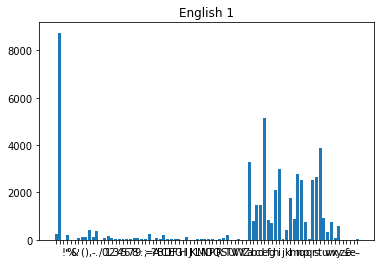

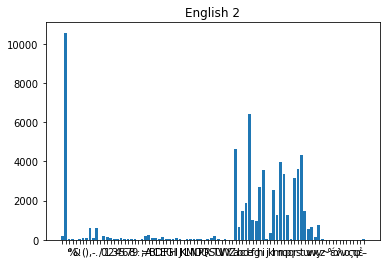

In [34]:
unigram_eng1 = Counter(ngrams(eng1,1)) ##just to get count of each element. 
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2307 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2310 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2311 missing from current font.
  font.set_text(s

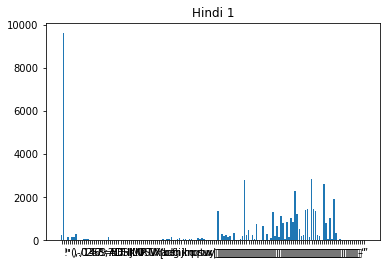

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2317 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128314 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2317 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2373 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128314 missing from current font.
  font.set_text(s

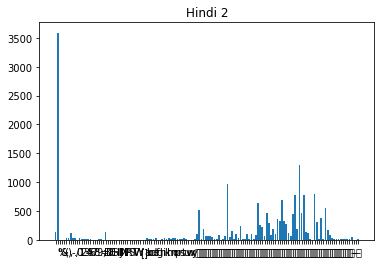

In [35]:
unigram_hin1 = Counter(ngrams(hin1,1))
plothistogram(unigram_hin1)
plt.title('Hindi 1')
plt.show()
unigram_hin2 = Counter(ngrams(hin2,1))
plothistogram(unigram_hin2)
plt.title('Hindi 2')
plt.show()

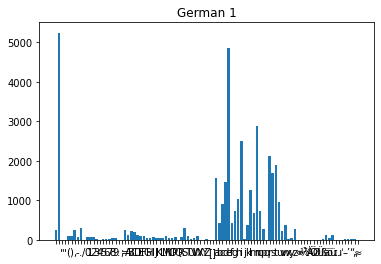

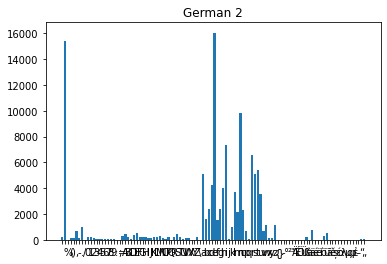

In [42]:
unigram_ger1 = Counter(ngrams(ger1,1))
plothistogram(unigram_ger1)
plt.title('German 1')
plt.show()
unigram_ger2 = Counter(ngrams(ger2,1))
plothistogram(unigram_ger2)
plt.title('German 2')
plt.show()

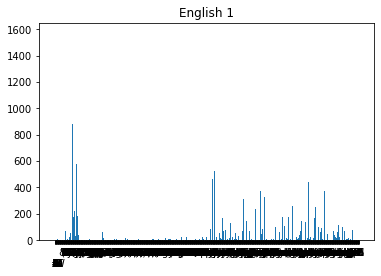

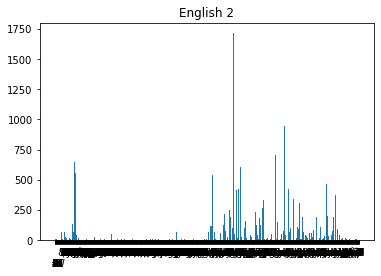

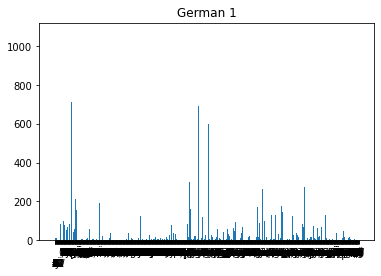

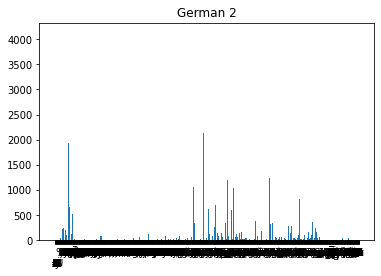

In [43]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_ger1 = Counter(ngrams(ger1,2))
plothistogram(bigram_ger1)
plt.title('German 1')
plt.show()

bigram_ger2 = Counter(ngrams(ger2,2))
plothistogram(bigram_ger2)
plt.title('German 2')
plt.show()

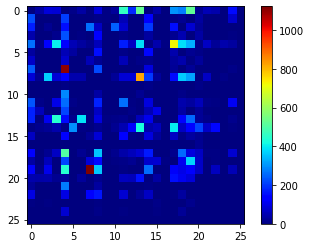

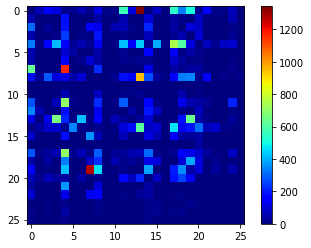

In [44]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

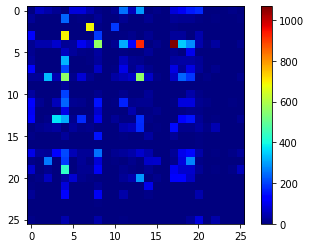

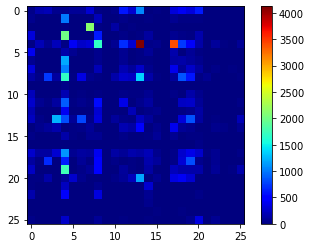

In [45]:
biger1 = plotbihistogram(bigram_ger1)
plt.show()
biger2 = plotbihistogram(bigram_ger2)

## Features of Images. 
### Images in digital format are stored as numeric values, and hence we can use these values as features. for ex : a black and white (binary) image is stored as an array of 0  and 255 or 0 and 1.

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [46]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [47]:
no1 = train_X[train_y==1,:,:] ## dataset corresponding to number = 1.
no0 = train_X[train_y==0,:,:] ## dataset corresponding to number = 0.

Let us visualize a few images here:

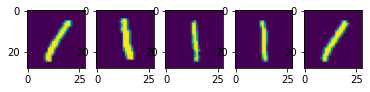

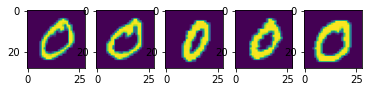

In [48]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [50]:
0o000000025500000000000000
0o000000025500000000000000
0o000000002550000000000000




0o00000000255000000000000
0o00025500000002550000000
0o002550000000000255500000000
0o002550000000000255500000000
0o00025500000002550000000

389561368130355200

In [51]:
a = no1>0
a.shape, no1.shape

((6742, 28, 28), (6742, 28, 28))

In [52]:
## to help you understand how the np.sum is working to find count of pixels that are not zero.

mtx = np.arange(8).reshape(2,2,2)
a = mtx>1
a[0][0][0]
type(a[0][0][0])


numpy.bool_

## We can even use value of each pixel as a feature. But let us see how to derive other features.

Now, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [53]:
## sum of pixel values.

sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

In [54]:
sum1.shape

(6742,)

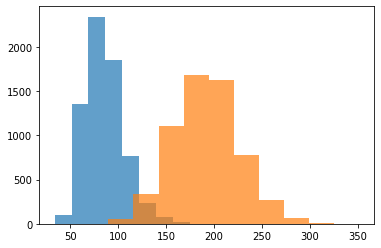

In [55]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);



We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [56]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  #print(img2)
  img2 = img2>0
  #print(img2)
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




Visualize a few:

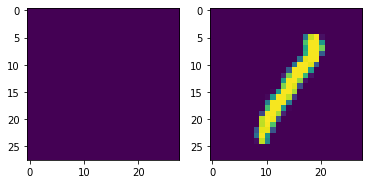

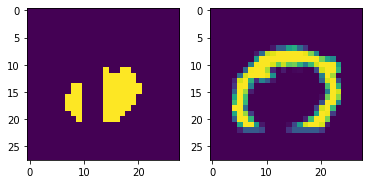

In [57]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

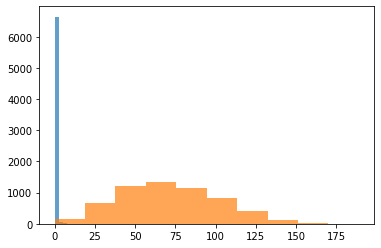

In [58]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero. 


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [59]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

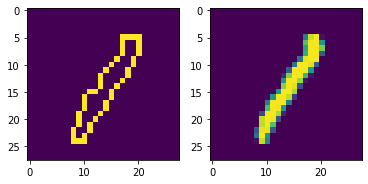

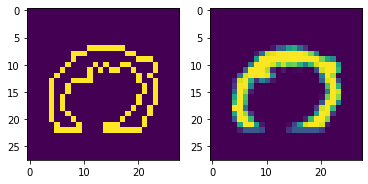

In [60]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

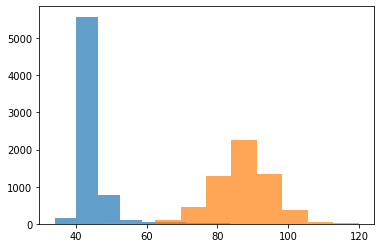

In [61]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together? 

Feel free to explore the above graph with your mouse. 


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

## Features from CSV file

In [62]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [63]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [64]:
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [65]:
df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})


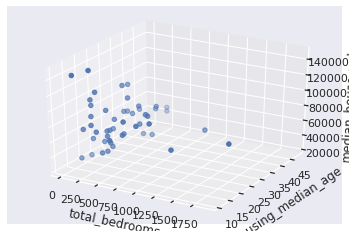

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['total_bedrooms'][:50]
y = df['housing_median_age'][:50]
z = df['median_house_value'][:50]

ax.set_xlabel("total_bedrooms")
ax.set_ylabel("housing_median_age")
ax.set_zlabel("median_house_value")

ax.scatter(x, y, z)

plt.show()

In [ ]:
## Task :
## Download a CSV file from the internet, upload it to your google drive.
## Read the CSV file and plot graphs using different combination of features and write your analysis
## Ex : IRIS flower datasaet

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
import pandas as pd

df = pd.read_csv('/IRIS.csv')

In [85]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

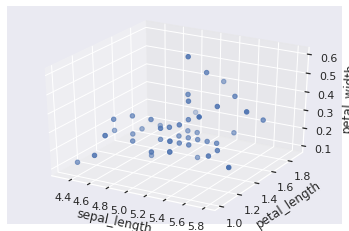

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['sepal_length'][:50]
y = df['petal_length'][:50]
z = df['petal_width'][:50]

ax.set_xlabel("sepal_length")
ax.set_ylabel("petal_length")
ax.set_zlabel("petal_width")

ax.scatter(x, y, z)

plt.show()

## Augmentation
It is a technique to increase the diversity of our training set by applying random (but realistic) transformations, such as image rotation, change of color etc. When we have limited training data, we can augment our data with help of these techniques.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

For this lab we will use a subset of MNIST that is very small, to better understand the effect of augmentation.

In [74]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

print("original data size:",train_X.shape)


original data size: (60000, 28, 28)


In [75]:
print(train_X[0].shape,train_y[0])

(28, 28) 5


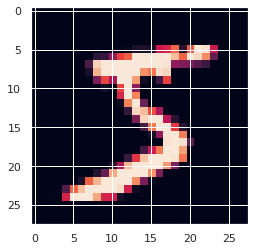

In [76]:
plt.imshow(train_X[0])

In [77]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

print("Now it is:", train_X.shape)

Now it is: (50, 28, 28)


Augmentation 1: rotation
Let us try rotating the image a little. We will use skimage library for this.

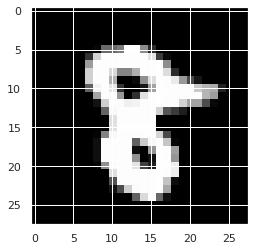

(28, 28)


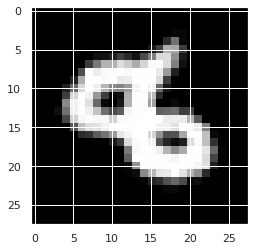

In [78]:
plt.imshow(train_X[2], cmap='gray')
plt.show()
print(train_X[2].shape)
plt.imshow(rotate(train_X[2],45), cmap='gray')

After rotating, the the class of the image is still the same. Let us make a function to rotate multiple images by random angles. We want a slightly different image every time we run this function. So, we generate a random number between 0 and 1 and change it so that it lies between -constraint/2 and +constraint/2

In [79]:
def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample

  print("shape of sample before is:", sample.shape)
  print("len(sample.shape)", len(sample.shape))
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  angle = rng.random(len(sample)) # generate random numbers for angles
  print("angle is:", angle)
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  print("angle with constraint is:", angle)
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.

This function returns a slightly different image each time we call it. So we can increase the number of images in the sample by any multiple. 

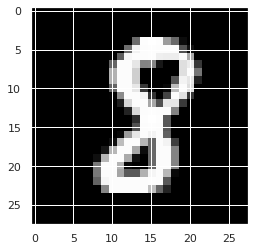

shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.77395605]
angle with constraint is: [19.1769234]
shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.43887844]
angle with constraint is: [-4.27850922]
shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.85859792]
angle with constraint is: [25.10185439]


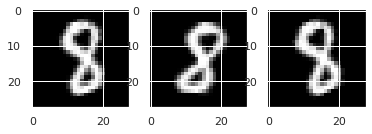

In [80]:
sample = train_X[20]
angleconstraint = 70
# show the original image
plt.imshow(sample, cmap='gray')
plt.show()
plt.subplot(1,3,1)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show an augmented image
plt.subplot(1,3,2)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show another augmented image from the same sample
plt.subplot(1,3,3)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # one more image from the same sample

Let us try one more augmentation, Shear: A transformation in which all points along a given line remain fixed while other points are shifted parallel to by a 
 distance proportional to their perpendicular distance from. Shearing a plane figure does not change its area. 

In [81]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount) # create the shear transform
  img = warp(sample, tform) # apply the shear
  # this makes the digit off-center. Since all the images in the test set are centralized, we will do the same here
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

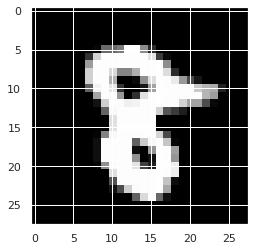

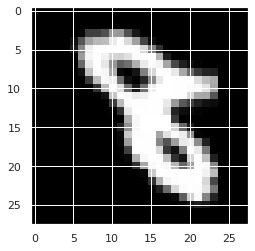

In [82]:
sample = train_X[2]
plt.imshow(sample, cmap='gray')
plt.show()

# apply shear
plt.imshow(shear(sample, 0.4), cmap='gray')

## Let us also see skeletonization of image

In [86]:
from skimage.morphology import skeletonize


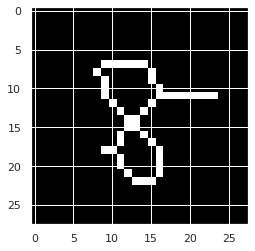

In [87]:
skeleton = skeletonize(train_X[2],method='lee')
plt.imshow(skeleton, cmap='gray')

In [88]:
#Structuring elements that are repeatedly used for thinning

S1 = np.array([[0,0,0],[-1,1,-1],[1,1,1]]) # -1 for dont care
S2 = np.array([[-1,0,0],[1,1,0],[-1,1,-1]])


def CheckMatch(window,kernel):
  for i in range(window.shape[0]):
        for j in range(window.shape[1]):
            if kernel[i,j]!=-1 and window[i,j]!=kernel[i,j]:
                return False
  return True

def ApplyKernel(image,kernel): #used
  height, width =  image.shape
  res = np.copy(image)
  for i in range(1,height-1):
    for j in range (1,width-1):
      window = image[i-1:i+2,j-1:j+2]
      #print('window shape',window.shape)
      Match_result = CheckMatch(window,kernel)
      if (Match_result):
        res[i,j]=0
  return res



def Skeletonization(image):
  '''pass binary image'''
  #new = np.copy(image)
  #old = np.zeros(image.shape,dtype=np.uint8)
  count = 1
  change = 1000
  while (change >0.01):
    print('count',count)
    new = image
    new = ApplyKernel(new,S1)
    new = ApplyKernel(new,S2)
    new = ApplyKernel(new,np.rot90(S1,1)) #90 degree rotate
    new = ApplyKernel(new,np.rot90(S2,1))
    new = ApplyKernel(new,np.rot90(S1,2)) # 180 degree rotate
    new = ApplyKernel(new,np.rot90(S2,2))
    new = ApplyKernel(new,np.rot90(S1,3)) # 270 degree rotate
    new = ApplyKernel(new,np.rot90(S2,3))
    count+= 1
    change = np.mean(np.abs(new-image))
    image = new
    plt.imshow(new,cmap='gray')
    plt.show()
  return new

In [89]:
binarized  =( train_X[0] > 0 ).astype(np.uint8)

count 1


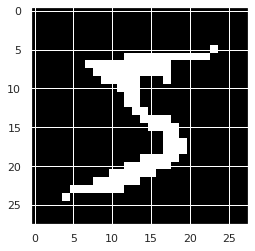

count 2


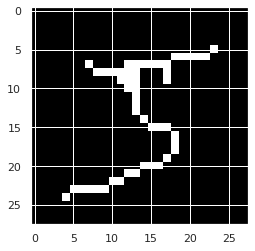

count 3


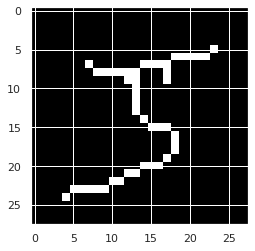

count 4


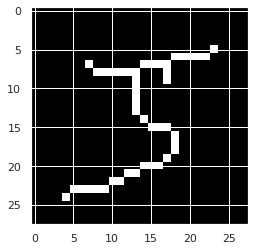

count 5


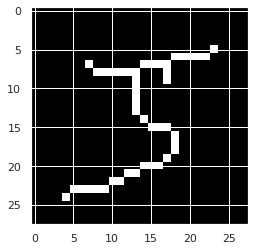

In [90]:
skeleton_five = Skeletonization(binarized)